In [1]:
!conda install -y gdown

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.14.0            |     pyhd8ed1ab_0          16 KB  conda-forge
    gdown-5.1.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.3.0              |       hd590300_0         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be 

In [2]:
! gdown 14ZQ7u5NFX1g08EkUt4RyVP_AcQfLrUAm

Downloading...
From (original): https://drive.google.com/uc?id=14ZQ7u5NFX1g08EkUt4RyVP_AcQfLrUAm
From (redirected): https://drive.google.com/uc?id=14ZQ7u5NFX1g08EkUt4RyVP_AcQfLrUAm&confirm=t&uuid=e878a830-1625-43d5-b961-77010bd98173
To: /kaggle/working/img_align_celeba.zip
100%|██████████████████████████████████████| 1.44G/1.44G [00:18<00:00, 78.1MB/s]


In [ ]:
! unzip /kaggle/working/img_align_celeba.zip

In [4]:
! git clone https://github.com/AAArpan/Diffusion-Model

Cloning into 'Diffusion-Model'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), 12.63 KiB | 1.80 MiB/s, done.


In [13]:
import glob
import os

import torchvision
from PIL import Image
from tqdm import tqdm
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset


class CustomData(Dataset):

    def __init__(self, split,im_path, im_ext='png'):

        self.split = split
        self.im_ext = im_ext
        self.images = self.load_images(im_path)
        self.crop_size = 178
        self.img_size = 32

    
    def load_images(self, im_path):

        assert os.path.exists(im_path), "images path {} does not exist".format(im_path)
        ims = []
        # labels = []
        for d_name in tqdm(os.listdir(im_path)):
            d_name = os.path.join(im_path,d_name)
            ims.append(d_name)
            # labels.append(int(d_name))
        print('Found {} images for split {}'.format(len(ims), self.split))
        return ims
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        im = Image.open(self.images[index])
        im = torchvision.transforms.CenterCrop(self.crop_size)(im)
        im = torchvision.transforms.Resize(self.img_size)(im)

        im_tensor = torchvision.transforms.ToTensor()(im)
        
        # Convert input to -1 to 1 range.
        im_tensor = (2 * im_tensor) - 1
        return im_tensor


100%|██████████| 202599/202599 [00:00<00:00, 420528.43it/s]

Found 202599 images for split train


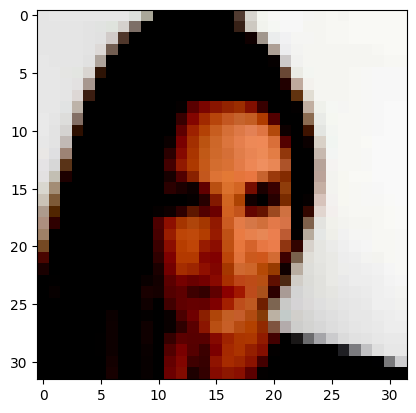

In [16]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

path = "/kaggle/working/img_align_celeba"
data = CustomData('train', im_path=path)

data_loader = DataLoader(data, batch_size=1, shuffle=True, num_workers=4)
dataiter = iter(data_loader)

image = next(dataiter)
image = image.numpy()
image= np.squeeze(image,0)

plt.imshow(np.transpose(image,(1,2,0)))

In [23]:
!cat /kaggle/input/yaml-file/dataset_params.yaml

dataset_params:
  im_path: '/kaggle/working/img_align_celeba'

diffusion_params:
  num_timesteps : 1000
  beta_start : 0.0001
  beta_end : 0.02

model_params:
  im_channels : 3
  im_size : 32
  crop_size : 178
  down_channels : [32, 64, 128, 256]
  mid_channels : [256, 256, 128]
  down_sample : [True, True, False]
  time_emb_dim : 128
  num_down_layers : 2
  num_mid_layers : 2
  num_up_layers : 2
  num_heads : 4

train_params:
  task_name: 'default'
  batch_size: 64
  num_epochs: 40
  num_samples : 100
  num_grid_rows : 10
  lr: 0.0001
  ckpt_name: 'ddpm_ckpt.pth'


In [28]:
! python3 /kaggle/working/Diffusion-Model/train.py --config /kaggle/input/yamfile/dataset_params.yaml

{'dataset_params': {'im_path': '/kaggle/working/img_align_celeba'}, 'diffusion_params': {'num_timesteps': 1000, 'beta_start': 0.0001, 'beta_end': 0.02}, 'model_params': {'im_channels': 3, 'im_size': 32, 'crop_size': 178, 'down_channels': [32, 64, 128, 256], 'mid_channels': [256, 256, 128], 'down_sample': [True, True, False], 'time_emb_dim': 128, 'num_down_layers': 2, 'num_mid_layers': 2, 'num_up_layers': 2, 'num_heads': 4}, 'train_params': {'task_name': 'default', 'batch_size': 90, 'num_epochs': 5, 'num_samples': 100, 'num_grid_rows': 10, 'lr': 0.0001, 'ckpt_name': 'ddpm_ckpt.pth'}}
100%|███████████████████████████████| 202599/202599 [00:00<00:00, 395485.82it/s]
Found 202599 images for split train
Loading checkpoint as found one
100%|███████████████████████████████████████| 2252/2252 [16:35<00:00,  2.26it/s]
Finished epoch:1 | Loss : 0.0289
100%|███████████████████████████████████████| 2252/2252 [16:34<00:00,  2.26it/s]
Finished epoch:2 | Loss : 0.0282
100%|████████████████████████████

In [43]:
! python3 /kaggle/working/Diffusion-Model/sample.py --config /kaggle/input/yamfile/dataset_params.yaml

{'dataset_params': {'im_path': '/kaggle/working/img_align_celeba'}, 'diffusion_params': {'num_timesteps': 1000, 'beta_start': 0.0001, 'beta_end': 0.02}, 'model_params': {'im_channels': 3, 'im_size': 32, 'crop_size': 178, 'down_channels': [32, 64, 128, 256], 'mid_channels': [256, 256, 128], 'down_sample': [True, True, False], 'time_emb_dim': 128, 'num_down_layers': 2, 'num_mid_layers': 2, 'num_up_layers': 2, 'num_heads': 4}, 'train_params': {'task_name': 'default', 'batch_size': 90, 'num_epochs': 5, 'num_samples': 100, 'num_grid_rows': 10, 'lr': 0.0001, 'ckpt_name': 'ddpm_ckpt.pth'}}
1000it [03:27,  4.83it/s]


In [45]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [46]:
download_file('/kaggle/working/default', 'out')


/kaggle/working/out.zip